In [1]:
!cd

C:\Users\admin\Desktop\데이터 공부 자료\day20\2021-K-Digital-Training-main\SQL


In [2]:
#!pip install PyMySQL==1.0.0

In [3]:
import pymysql.cursors
# Connect to the database

In [4]:
connection = pymysql.connect(host='localhost',
        user='me',
        password='9421',
        db='tip',
        charset='utf8',
        cursorclass=pymysql.cursors.DictCursor)

In [5]:
try:
    with connection.cursor() as cursor:
        # Read a single record
        #sql = "SELECT `id`, `password` FROM `users` WHERE `email`=%s"
        sql = "select * from tips where tips.day='';"
        cursor.execute(sql)
        result = cursor.fetchone()
        print(result)
finally:
    connection.close()

None


In [6]:
import pandas as pd

In [7]:
# MySQL DB에서 데이터 받아와서 DataFrame에 저장

conn = pymysql.connect(host='localhost', user='me', 
                       password='9421', db='tip', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      sql = "select * from tips;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    
      df.to_csv('query.csv')

finally:

   conn.close()

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner   2.0
1         10.34  1.66    Male     No   Sun  Dinner   3.0
2         21.01  3.50    Male     No   Sun  Dinner   3.0
3         23.68  3.31    Male     No   Sun  Dinner   2.0
4         24.59  3.61  Female     No   Sun  Dinner   4.0
..          ...   ...     ...    ...   ...     ...   ...
245        3.07  1.00  Female    Yes   Sat  Dinner   3.0
246        3.07  1.00  Female    Yes  None  Dinner   3.0
247        3.07  1.00  Female    Yes  None  Dinner   NaN
248        3.07  1.00    None    Yes   Sun  Dinner   NaN
249        3.07  1.00  Female    Yes   Sun  Dinner   NaN

[250 rows x 7 columns]


In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
245,3.07,1.00,Female,Yes,Sat,Dinner,3.0
246,3.07,1.00,Female,Yes,None,Dinner,3.0
247,3.07,1.00,Female,Yes,None,Dinner,NaN
248,3.07,1.00,None,Yes,Sun,Dinner,NaN


In [9]:
df['sex'].replace({'Female':0,'Male':1},inplace=True)

In [10]:
df['smoker'].replace({'No':0,'Yes':1},inplace=True)

In [11]:
df["day"].replace({"Thur" : 0, "Fri" : 1, "Sat" : 2, "Sun" : 3},inplace=True)

In [12]:
df['time'].replace({'Lunch':0,'Dinner':1},inplace=True)

In [13]:
df.isnull().sum()         #data frame에서 nan 찾기

total_bill    0
tip           0
sex           1
smoker        0
day           2
time          0
size          3
dtype: int64

In [14]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,250.000000,250.000000,249.000000,250.000000,248.000000,250.000000,247.000000
mean,19.440440,2.950360,0.630522,0.392000,1.741935,0.728000,2.570850
std,9.103058,1.400742,0.483636,0.489176,1.154964,0.445883,0.946775
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.137500,2.000000,0.000000,0.000000,0.750000,0.000000,2.000000
50%,17.490000,2.750000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,24.047500,3.507500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
#df=pd.read_csv('tips.csv')

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer

In [18]:
data=df.values           #data frame -> array로 바꾸기

In [19]:
data

array([[16.99,  1.01,  0.  , ...,  3.  ,  1.  ,  2.  ],
       [10.34,  1.66,  1.  , ...,  3.  ,  1.  ,  3.  ],
       [21.01,  3.5 ,  1.  , ...,  3.  ,  1.  ,  3.  ],
       ...,
       [ 3.07,  1.  ,  0.  , ...,   nan,  1.  ,   nan],
       [ 3.07,  1.  ,   nan, ...,  3.  ,  1.  ,   nan],
       [ 3.07,  1.  ,  0.  , ...,  3.  ,  1.  ,   nan]])

In [20]:
data.shape

(250, 7)

In [21]:
data[:,-1]

array([ 2.,  3.,  3.,  2.,  4.,  4.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
        4.,  2.,  2.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  4.,  2.,  4.,
        2.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  2.,  3.,  3.,  3.,  3.,
        3.,  3.,  2.,  2.,  2.,  4.,  2.,  2.,  4.,  3.,  2.,  2.,  2.,
        4.,  2.,  4.,  2.,  4.,  2.,  2.,  4.,  2.,  2.,  2.,  4.,  3.,
        3.,  2.,  1.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  4.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  3.,  2.,  3.,  2.,  4.,
        2.,  2.,  4.,  2.,  2.,  2.,  2.,  2.,  6.,  2.,  2.,  2.,  3.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  6.,  5.,
        6.,  2.,  2.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  4.,  4.,  5.,
        6.,  4.,  2.,  4.,  4.,  2.,  3.,  2.,  2.,  3.,  2.,  4.,  2.,
        2.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4

In [22]:
sum(np.isnan(data).flatten())          #array에서 nan값 찾기

6

In [23]:
imputer = SimpleImputer(strategy='median')

In [24]:
imputer.fit(data)

SimpleImputer(strategy='median')

In [25]:
datatrans = imputer.transform(data)

In [26]:
datatrans[:,-1]

array([2., 3., 3., 2., 4., 4., 2., 4., 2., 2., 2., 4., 2., 4., 2., 2., 3.,
       3., 3., 3., 2., 2., 2., 4., 2., 4., 2., 2., 2., 2., 2., 4., 2., 4.,
       2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 4., 2., 2., 4., 3., 2., 2.,
       2., 4., 2., 4., 2., 4., 2., 2., 4., 2., 2., 2., 4., 3., 3., 2., 1.,
       2., 2., 2., 3., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 1., 2., 2.,
       4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 1., 3., 2., 3., 2., 4., 2., 2.,
       4., 2., 2., 2., 2., 2., 6., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 6., 5., 6., 2., 2., 3., 2., 2., 2., 2., 2., 3.,
       4., 4., 5., 6., 4., 2., 4., 4., 2., 3., 2., 2., 3., 2., 4., 2., 2.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 3., 4., 2., 5., 3.,
       5., 3., 3., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 3., 2., 2., 2.,
       4., 3., 3., 4., 2., 2., 3., 4., 4., 2., 3., 2., 5., 2., 2., 4., 2.,
       2., 1., 3., 2., 2.

In [27]:
df_trans=pd.DataFrame(datatrans)

In [28]:
df_trans.isnull()

,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False


In [29]:
df_trans.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [30]:
#데이터 값 사이에 ''가 들어가 있어서 나는 원본에서 지우는 방법을 택했다.
#df.replace('',np.nan,inplace=True) / df=df.drop('day',axis=1)
#을 이용해서도 데이터 값 사이의 ''를 지울 수 있다.
#-----------끝-------------

In [ ]:
#pca는 독립변수들끼리의 상관관계만으로만 차원을 축소시키고 
#rfe는 독립변수들과 목표변수와의 관계를 통해 차원을 축소시킨다

In [ ]:
#예전에 공부했던 내용들

In [31]:
df.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
245     3.07
246     3.07
247     3.07
248     3.07
249     3.07
Name: total_bill, Length: 250, dtype: float64

In [32]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
245     3.07
246     3.07
247     3.07
248     3.07
249     3.07
Name: total_bill, Length: 250, dtype: float64

<AxesSubplot:>

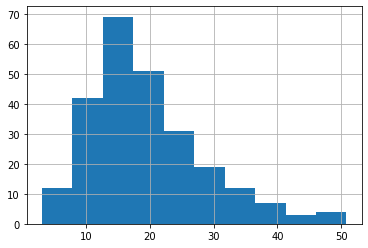

In [33]:
df['total_bill'].hist()

In [34]:
#새출발

In [35]:
import pymysql.cursors
import pandas as pd

In [36]:
sql="select customers.customerName, payments.checkNumber from customers left join payments on customers.customerNumber=payments.customerNumber where payments.paymentDate >= '2004-10-06';"

In [37]:
conn = pymysql.connect(host='localhost', user='me', 
                       password='9421', db='classicmodels', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    
    #df.to_csv('query.csv')

finally:

   conn.close()

                    customerName checkNumber
0              Atelier graphique    HQ336336
1              Atelier graphique    OM314933
2             Signal Gift Stores    BO864823
3     Australian Collectors, Co.    MA765515
4              La Rochelle Gifts    DB933704
..                           ...         ...
84              FunGiftIdeas.com    PE176846
85    Iberia Gift Imports, Corp.    GK294076
86  Motor Mint Distributors Inc.     HS86661
87             Kelly's Gift Shop    EU531600
88             Kelly's Gift Shop     MN89921

[89 rows x 2 columns]


In [38]:
df.to_csv('query_car.csv')